In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Load the data
file_path = 'articulation_angle_log.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Ensure that timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [41]:
# Create datasets
df_ground_truth = df[['timestamp', 'ground_truth']].dropna(subset=['ground_truth'])
df_marker = df[['timestamp', 'markers']].dropna(subset=['markers'])
df_range = df[['timestamp', 'range']].dropna(subset=['range'])
df_filtered = df[['timestamp', 'filtered']].dropna(subset=['filtered'])

# Convert to NumPy arrays explicitly for plotting
timestamps_gt = df_ground_truth['timestamp'].to_numpy()
ground_truth_values = df_ground_truth['ground_truth'].to_numpy()

timestamps_marker = df_marker['timestamp'].to_numpy()
markers_values = df_marker['markers'].to_numpy()

timestamps_range = df_range['timestamp'].to_numpy()
range_values = df_range['range'].to_numpy()

timestamps_filtered = df_filtered['timestamp'].to_numpy()
filtered_values = df_filtered['filtered'].to_numpy()

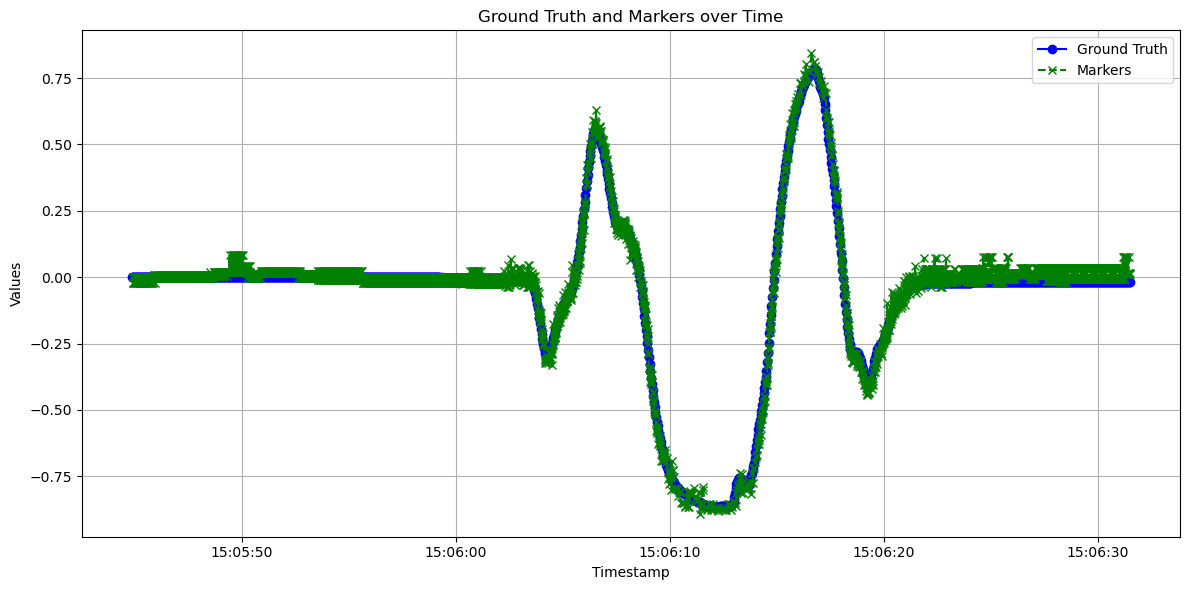

In [42]:
# Plot 1: Timestamp vs Ground Truth and Marker
plt.figure(figsize=(12, 6))
plt.plot(timestamps_gt, ground_truth_values, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(timestamps_marker, markers_values, label='Markers', marker='x', linestyle='--', color='green')

plt.title('Ground Truth and Markers over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


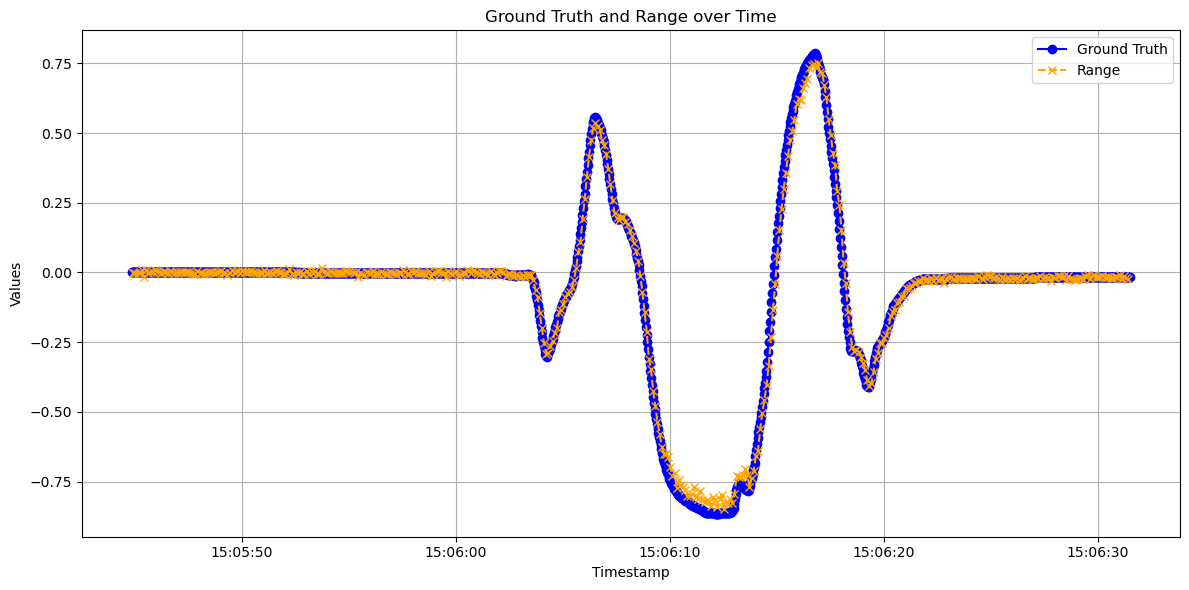

In [43]:
# Plot 2: Timestamp vs Ground Truth and Range
plt.figure(figsize=(12, 6))
plt.plot(timestamps_gt, ground_truth_values, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(timestamps_range, range_values, label='Range', marker='x', linestyle='--', color='orange')

plt.title('Ground Truth and Range over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

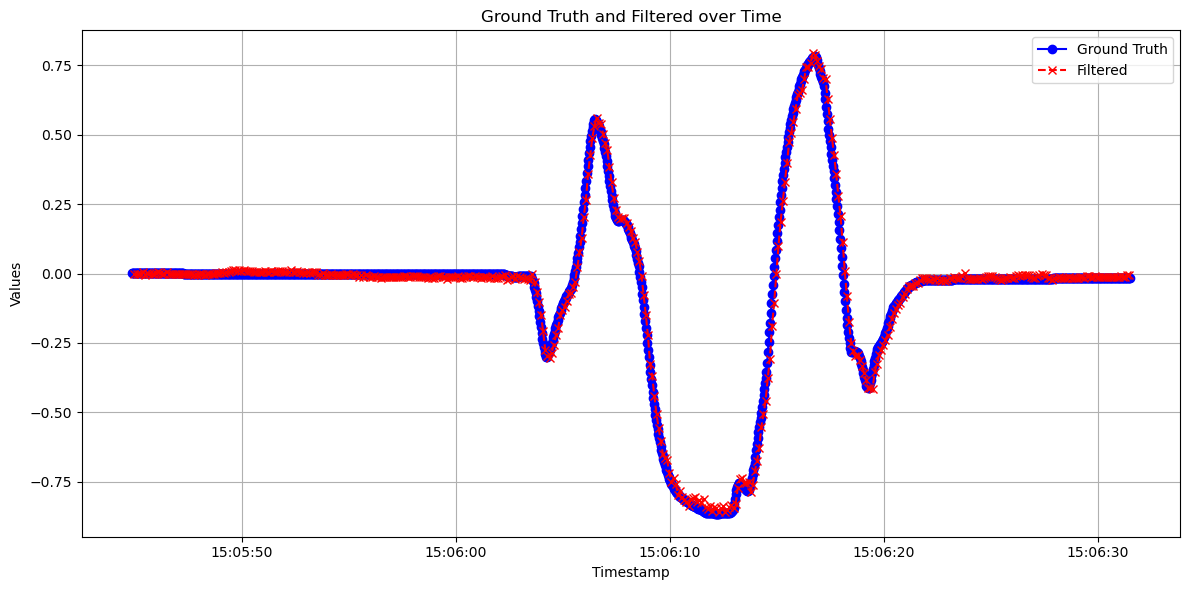

In [44]:
# Plot 3: Timestamp vs Ground Truth and Filtered
plt.figure(figsize=(12, 6))
plt.plot(timestamps_gt, ground_truth_values, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(timestamps_filtered, filtered_values, label='Filtered', marker='x', linestyle='--', color='red')

plt.title('Ground Truth and Filtered over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()